In [2]:
import pandas as pd
import numpy as np



In [3]:
tennis = pd.read_csv('https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv')
tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
tennis_ct = pd.crosstab(tennis['Outlook'],tennis['Play Tennis'],margins=True)/len(tennis)
tennis_ct

Play Tennis,No,Yes,All
Outlook,,,
Overcast,0.000000,0.285714,0.285714
Rain,0.142857,0.214286,0.357143
Sunny,0.214286,0.142857,0.357143
All,0.357143,0.642857,1.000000


In [34]:
tennis_ct.No.Rain

0.14285714285714285

### Marginal Probabilities:
- p(over)
- p(rainy)
- p(sunny)
- p(yes)
- p(no)

In [12]:
tennis_ct.No.All

0.35714285714285715

In [18]:
p_over = tennis_ct.All.Overcast
p_sunny = tennis_ct.All.Sunny
p_rain = tennis_ct.All.Rain

p_no =tennis_ct.No.All
p_yes = tennis_ct.Yes.All

### joint Probabilities
- p(no and over)
- p(yes ana over)

- p(no and sunny)
- p(yes and sunny)

- p(no and rain)
- p(yes and rain)

In [16]:
tennis_ct.No.Overcast

0.0

In [17]:
p_no_over =tennis_ct.No.Overcast
p_yes_over = tennis_ct.Yes.Overcast

p_no_sunny = tennis_ct.No.Sunny
p_yes_sunny = tennis_ct.Yes.Sunny

p_no_rain = tennis_ct.No.Rain
p_yes_rain = tennis_ct.Yes.Rain

### Conditional probabilities
- p(no/over) = p(no intersection over)/p(over)
- p(yes/over)

- p(no/sunny)
- p(yes/sunny)

- p(no/rain)
- p(yes/rain)

In [19]:
p_no_given_over = p_no_over / p_over
p_yes_given_over = p_yes_over / p_over

p_no_given_sunny = p_no_sunny / p_sunny
p_yes_given_sunny = p_yes_sunny / p_sunny

p_no_given_rain = p_no_rain / p_rain
p_yes_given_rain = p_yes_rain / p_rain

In [21]:
p_no_given_rain,p_yes_given_rain

(0.39999999999999997, 0.6)

In [23]:
a = 2
b = 3
a<b

True

In [24]:
def prediction(a,b):
    if a > b:
        return 'No'
    else:
        return 'yes'

In [25]:
prediction(p_no_given_rain,p_yes_given_rain)

'yes'

In [28]:
pred = []
for i in tennis['Outlook']:
    if i == 'Sunny':
        pred.append(prediction(p_no_given_sunny,p_yes_given_sunny))
    elif i == 'Overcast':
        pred.append(prediction(p_no_given_over,p_yes_given_over))
    else:
        pred.append(prediction(p_no_given_rain,p_yes_given_rain))
        
        

In [29]:
tennis['new_play'] = pred

In [30]:
tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis,new_play
0,Sunny,Hot,High,Weak,No,No
1,Sunny,Hot,High,Strong,No,No
2,Overcast,Hot,High,Weak,Yes,yes
3,Rain,Mild,High,Weak,Yes,yes
4,Rain,Cool,Normal,Weak,Yes,yes
5,Rain,Cool,Normal,Strong,No,yes
6,Overcast,Cool,Normal,Strong,Yes,yes
7,Sunny,Mild,High,Weak,No,No
8,Sunny,Cool,Normal,Weak,Yes,No
9,Rain,Mild,Normal,Weak,Yes,yes


In [31]:
10/14

0.7142857142857143

### Probability Distributions

In [3]:
dice1 = np.arange(1,7)
dice2 = np.arange(1,7)

In [5]:
dice1,dice2

(array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6]))

In [53]:
df = pd.DataFrame(np.array(np.meshgrid(dice1,dice2)).T.reshape(-1,2))
df.head()

,0,1
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [54]:
df.columns = ['dice1','dice2']

In [55]:
df['Sum'] = df['dice1'] + df['dice2']
df

,dice1,dice2,Sum
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6
5,1,6,7
6,2,1,3
7,2,2,4
8,2,3,5
9,2,4,6


In [56]:
df_sum = pd.DataFrame(df['Sum'].value_counts().sort_index()).reset_index()
df_sum

,index,Sum
0,2,1
1,3,2
2,4,3
3,5,4
4,6,5
5,7,6
6,8,5
7,9,4
8,10,3
9,11,2


In [57]:
df_sum.rename(columns = {'index':'x'},inplace=True)

In [61]:
df_sum['probabilities'] = np.round(df_sum.Sum/len(df),3)

In [62]:
df_sum

,x,Sum,probabilities
0,2,1,0.028
1,3,2,0.056
2,4,3,0.083
3,5,4,0.111
4,6,5,0.139
5,7,6,0.167
6,8,5,0.139
7,9,4,0.111
8,10,3,0.083
9,11,2,0.056


In [64]:
df_sum['cummulative_probs'] = np.cumsum(df_sum['probabilities'])

In [65]:
df_sum

,x,Sum,probabilities,cummulative_probs
0,2,1,0.028,0.028
1,3,2,0.056,0.084
2,4,3,0.083,0.167
3,5,4,0.111,0.278
4,6,5,0.139,0.417
5,7,6,0.167,0.584
6,8,5,0.139,0.723
7,9,4,0.111,0.834
8,10,3,0.083,0.917
9,11,2,0.056,0.973


In [67]:
import seaborn as sns

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


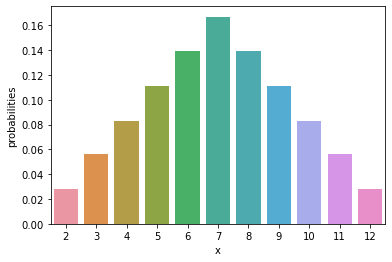

In [69]:
sns.barplot(df_sum['x'],df_sum['probabilities']);


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


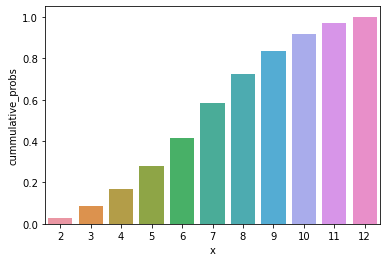

In [70]:
sns.barplot(df_sum['x'],df_sum['cummulative_probs']);


https://latex.codecogs.com/eqneditor/editor.php

## $$mean = \sum x * p(x)$$

## $$variance = \sum x^{2} * p(x) - \bar{x} ^ {2}$$

### Binomial Distribution

## $$p(x) = \binom{n}{x} p^{x} q^{n-x}$$

An agent sells life insurance policies to five equally aged, healthy people. According 
to recent data, the probability of a person living in these conditions for 30 years or 
more is 2/3. Calculate the probability that after 30 years:
1. All five people are still living.
2. At least three people are still living.
3. Exactly two people are still living.


In [1]:
from scipy import stats

In [2]:
stats.binom.pmf(3,5,2/3)

0.32921810699588466

In [6]:
for i in range(6):
    print(i, 'probability is: ',stats.binom.pmf(i,5,2/3))

0 probability is:  0.004115226337448562
1 probability is:  0.041152263374485604
2 probability is:  0.16460905349794244
3 probability is:  0.32921810699588466
4 probability is:  0.32921810699588466
5 probability is:  0.13168724279835387


p(x>=3) = 1 - p(x<3) = 1 - p(x<=2)

In [8]:
1 - stats.binom.cdf(2,5,2/3)

0.7901234567901234

**If from six to seven in the evening one telephone line in every five is engaged in a 
conversation: what is the probability that when 10 telephone numbers are chosen at 
random, only two are in use?**


The probability of a man hitting the target at a shooting range is 1/4. If he shoots 10 
times, what is the probability that he hits the target exactly three times? What is the 
probability that he hits the target at least once?

In [3]:
n = 10
x = 3
p = 1/4

stats.binom.pmf(x,n,p)

0.2502822875976561

p(x>=1) = 1 - p(x<1) = 1 - p(x<=0)

In [4]:
1 - stats.binom.cdf(0,10,1/4)

0.9436864852905273

In [5]:
stats.binom.pmf(0,10,1/4)

0.056313514709472656

In [7]:
for i in range(11):
    print(i, 'probability is: ',stats.binom.pmf(i,10,1/4),'-',
          stats.binom.cdf(i,10,1/4))

0 probability is:  0.056313514709472656 - 0.056313514709472684
1 probability is:  0.1877117156982421 - 0.24402523040771484
2 probability is:  0.2815675735473633 - 0.5255928039550781
3 probability is:  0.2502822875976561 - 0.7758750915527344
4 probability is:  0.14599800109863284 - 0.9218730926513672
5 probability is:  0.058399200439453146 - 0.9802722930908203
6 probability is:  0.016222000122070295 - 0.9964942932128906
7 probability is:  0.0030899047851562496 - 0.9995841979980469
8 probability is:  0.00038623809814453125 - 0.9999704360961914
9 probability is:  2.8610229492187456e-05 - 0.9999990463256836
10 probability is:  9.5367431640625e-07 - 1.0


In [8]:
mean = n * p 
mean

2.5

### Poisson Distribution

## $$p(x) = \frac {{}e^{-\lambda } * \lambda ^{x}}{x!}$$


 **In a cafe, the customer arrives at a mean rate of 2 per min. Find the probability of 
arrival of 5 customers in 1 minute**

In [9]:
avg = 2
x = 5

stats.poisson.pmf(x,avg)

0.03608940886309672

 If 3% of electronic units manufactured by a company are defective. Find the 
probability that in a sample of 200 units, less than 2 bulbs are defective.


A manufacturer produces light-bulbs that are packed into boxes of 100. If quality control 
studies indicate that 0.5% of the light-bulbs produced are defective, what percentage of the 
boxes will contain

In [10]:

stats.norm.cdf(90,100,10)

0.15865525393145707

Most graduate schools of business require applicants for admission to take the Graduate 
Management Admission Council’s GMAT examination. Scores on the GMAT are roughly 
normally distributed with a mean of 527 and a standard deviation of 112. What is the 
probability of an individual scoring above 500 on the GMAT?

In [12]:
mean = 527
sd = 112
x = 500

p_x_less_or_equal = stats.norm.cdf(500,527,112)

In [13]:
p_x_greater_500 = 1 - p_x_less_or_equal
p_x_greater_500

0.5952501217429682